## Processing data

In [1]:
import pandas as pd
cafe_reviews = pd.read_parquet("cafe_reviews.parquet")

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, RegexpTokenizer
from nltk.corpus import words
from nltk.tokenize import SyllableTokenizer

# download package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

# upload stopwords and string
punctuations = set(string.punctuation)
english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /home/jupyter/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
cafe_reviews['text']

11         Locals recommended Milktooth, and it's an amaz...
19         My absolute favorite cafe in the city. Their b...
43         Stopped by after a Sunday morning walk in the ...
127        Milktooth is the place to go if you want a goo...
243        So much to like about this place--the beautifu...
                                 ...                        
6989334    The Black Cat Cafe is a nice little restaurant...
6989383    Cherry Espresso Bar is located inside a buildi...
6989397    Since I'm now working from home, I'm trying to...
6989508    I am surprised by the recent negative reviews....
6989525    Fiddlehead Fern Cafe keeps getting better and ...
Name: text, Length: 111685, dtype: object

In [4]:
cr_text = pd.DataFrame(cafe_reviews.text.str.lower())
cr_text

,text
11,"locals recommended milktooth, and it's an amaz..."
19,my absolute favorite cafe in the city. their b...
43,stopped by after a sunday morning walk in the ...
127,milktooth is the place to go if you want a goo...
243,so much to like about this place--the beautifu...
...,...
6989334,the black cat cafe is a nice little restaurant...
6989383,cherry espresso bar is located inside a buildi...
6989397,"since i'm now working from home, i'm trying to..."
6989508,i am surprised by the recent negative reviews....


### clean the text

In [5]:
casual_tknzr = TweetTokenizer(reduce_len=True)
cafe_tokenized = [casual_tknzr.tokenize(t) for t in cr_text['text']] 
cafe_tokenized[0]

['locals',
 'recommended',
 'milktooth',
 ',',
 'and',
 "it's",
 'an',
 'amazing',
 'jewel',
 'of',
 'indianapolis',
 '.',
 "i'm",
 'glade',
 'i',
 'had',
 'the',
 'chance',
 'to',
 'experience',
 'this',
 '.']

In [6]:
english_words = set(words.words())
stop_words = set(stopwords.words('english'))
#punctuations = set(string.punctuation) Interested in removing these to see if it helps. if not, paste -> into list comprehension. ||| and word not in punctuations
cafe_txt_filtered = [[word for word in sentence if word.lower() not in stop_words and word.lower() in english_words] for sentence in cafe_tokenized]
cafe_txt_trunc = [sentence[:30] for sentence in cafe_txt_filtered]  # shortening reviews to 30 tokens. Hopes to fix computation
print(cafe_txt_trunc[1])

['absolute', 'favorite', 'city', 'black', 'white', 'probably', 'best', 'ever', 'sweet', 'right', 'amount', 'foam', 'always', 'really', 'good', 'even', 'people', 'lot', 'space', 'work', 'noise', 'level', 'perfect', 'music', 'perfect', 'level', 'always', 'enjoy', 'bring', 'dogs']


In [7]:
cr_text["clean_text"] = [" ".join(sentence) for sentence in cafe_txt_trunc]
cv = CountVectorizer()
t = cv.fit_transform(cr_text["clean_text"])

In [8]:
freq_array = t.sum(axis=0).A1
cafe_token_freq = pd.DataFrame({"token": cv.get_feature_names_out(), 'freq_count': freq_array})

In [9]:
cafe_token_freq.sort_values(by='freq_count', ascending=False)

,token,freq_count
2630,coffee,56345
10460,place,48129
6282,great,39914
5614,food,37324
6165,good,35694
...,...,...
12078,ruff,1
2135,caterpillar,1
6287,greediness,1
6290,greener,1


### vectorize

In [10]:
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer

# Save TF-IDF as a sparse matrix (NO `.toarray()`)
tfidf_model = TfidfVectorizer()
df_tfidf_transformed = tfidf_model.fit_transform(cr_text["clean_text"])

In [11]:
tfidf_vectors = pd.DataFrame.sparse.from_spmatrix(df_tfidf_transformed, columns=tfidf_model.get_feature_names_out())

tfidf_vectors

,aa,aback,abandon,abandoned,abatement,abbey,abdomen,aberration,abhor,abhorrent,...,zippy,zodiac,zombie,zone,zoned,zoning,zoo,zoom,zowie,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With this, we can begin topic modeling.

## Topic Modeling

### LDA method

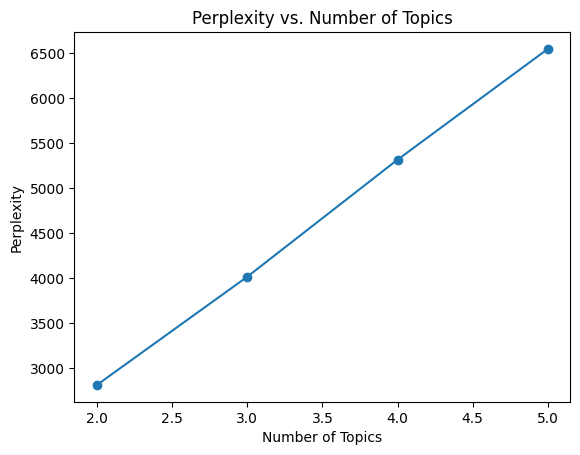

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

perplexities = [] #lower perplexity = better
topic_range = range(2,6)

for num_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(df_tfidf_transformed)
    perplexities.append(lda.perplexity(df_tfidf_transformed))

import matplotlib.pyplot as plt

plt.plot(topic_range, perplexities, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity vs. Number of Topics")
plt.show()

Since the perplexity graph line is increasing as the number of topics grow, it appears that adding more topics is making the model less effective. So, the best choice would be 2 topics because it has the lowest perplexity.

In [19]:
optimal_topics = 2  # Based on the perplexity graph
lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
lda_topics = lda.fit_transform(df_tfidf_transformed)

In [20]:
# to show top words per topic
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

print("Top words for each topic:")
display_topics(lda, tfidf_model.get_feature_names_out())

Top words for each topic:
Topic 1: coffee, location, service, get, always, drink, order, staff, friendly, time
Topic 2: cake, product, side, reserve, frappe, display, worker, price, patio, refill


it looks like topic one has to do with customer experience and service quality and topic two looks like it's more about the food and ambience (vibes!).

In [21]:
# assigning topic to each of the reviews
cr_text["dominant_topic"] = lda_topics.argmax(axis=1)

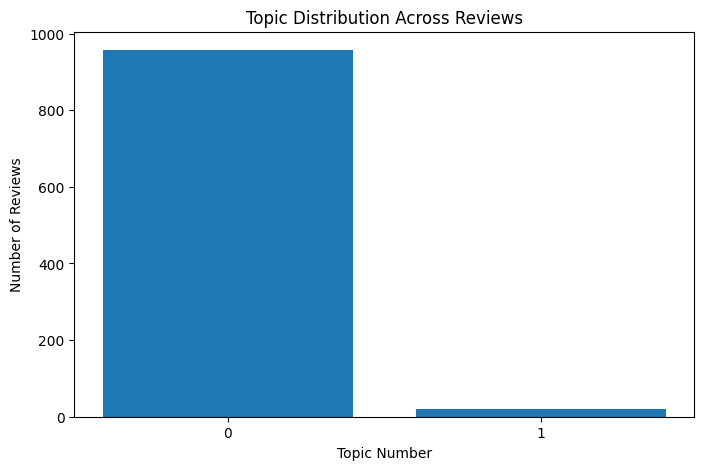

In [22]:
topic_counts = cr_text["dominant_topic"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.title("Topic Distribution Across Reviews")
plt.xticks(topic_counts.index)
plt.show()

There is an imbalance that exists amongst the number of reviews in the two topics

#### Get topics for a single review function

In [23]:
import pandas as pd

def get_review_topics(review_index):
    """
    Return the topic distribution for a single review.
    review_index should match the row index in df_tfidf_transformed and cr_text.
    """

    review_vector = df_tfidf_transformed[review_index]

    topic_dist = lda.transform(review_vector)

    topic_series = pd.Series(topic_dist[0], index=[f"Topic {i}" for i in range(topic_dist.shape[1])])
    return topic_series

#### Comparing Two Reviews by Topic Similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

review1 = 10  
review2 = 18

topics1 = get_review_topics(review1).values.reshape(1, -1)
topics2 = get_review_topics(review2).values.reshape(1, -1)

# Cosine similarity in terms of topic distributions
topics_similarity = cosine_similarity(topics1, topics2)[0, 0]

print(f"Topic similarity between review {review1} and review {review2} = {topics_similarity:.4f}")

Topic similarity between review 10 and review 18 = 0.9998


### Experimenting with NMF instead

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


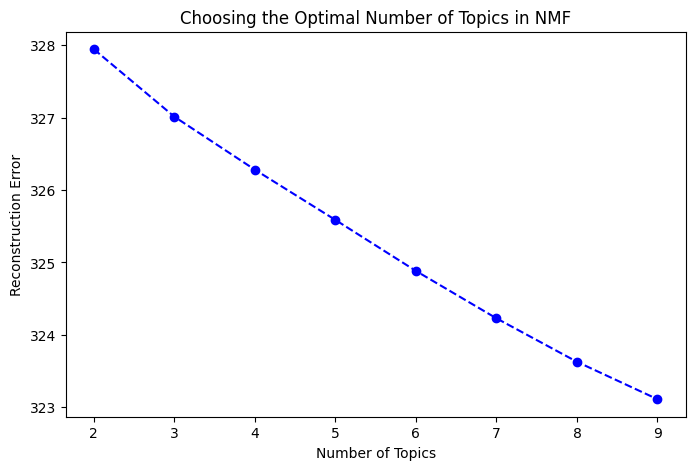

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

topic_range = range(2, 10)  

errors = []  

for num_topics in topic_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(df_tfidf_transformed)
    errors.append(nmf_model.reconstruction_err_)  # Get error for each topic number

# Plot the error curve
plt.figure(figsize=(8,5))
plt.plot(topic_range, errors, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("Choosing the Optimal Number of Topics in NMF")
plt.show()

Choosing 4 as the optimal number of topics based on this graph

In [21]:
num_topics = 4
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(df_tfidf_transformed)  # Document-topic matrix
H = nmf_model.components_

Custom function to obtain words for each topic 

In [24]:
def display_nmf_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

feature_names = tfidf_model.get_feature_names_out()

display_nmf_topics(nmf_model, feature_names, num_words=10)

Topic 1: time, one, place, go, breakfast, got, get, ordered, wait, delicious
Topic 2: coffee, shop, love, iced, place, work, cup, best, nice, local
Topic 3: great, food, service, friendly, staff, place, atmosphere, amazing, love, delicious
Topic 4: good, really, nice, food, pretty, place, service, breakfast, little, also


Topic 1	is related to Ordering Experience & Wait Time	
Topic 2	is related to Coffee Shops & Cafe Culture
Topic 3	is related to Restaurant Service & Atmosphere
Topic 4	is realted to General Food & Ambiance Reviews

Assign the dominant topic to each review

In [25]:
cr_text["dominant_topic"] = W.argmax(axis=1)

Topic distribution Plot

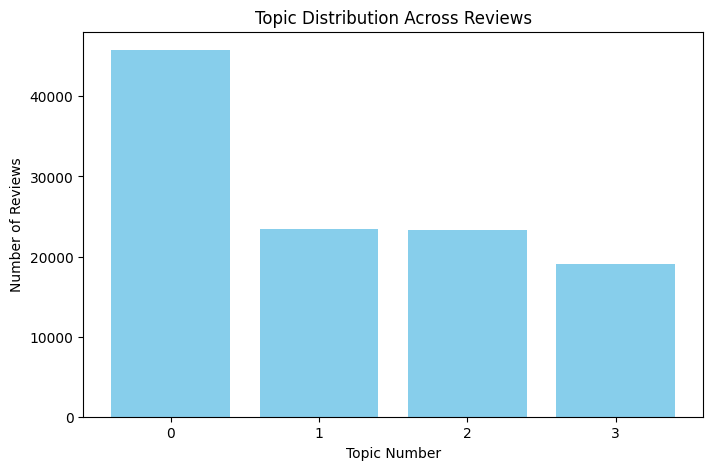

In [26]:
topic_counts = cr_text["dominant_topic"].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.title("Topic Distribution Across Reviews")
plt.xticks(topic_counts.index)
plt.show()

Function to see topic distribution for a single review under NMF

In [27]:
import pandas as pd

def get_review_topics_nmf(review_index):
    topic_dist = W[review_index]  
    topic_series = pd.Series(
        topic_dist,
        index=[f"Topic {i}" for i in range(topic_dist.shape[0])]
    )
    return topic_series

review_index = 10  
print(get_review_topics_nmf(review_index))


Topic 0    0.018314
Topic 1    0.000118
Topic 2    0.008037
Topic 3    0.002255
dtype: float64


Obtain topic similarity between two reviews using cosine similarity 

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

review1 = 10  # Choose valid row indices from cr_text
review2 = 24

topics1 = get_review_topics_nmf(review1).values.reshape(1, -1)
topics2 = get_review_topics_nmf(review2).values.reshape(1, -1)

topics_similarity = cosine_similarity(topics1, topics2)[0, 0]

print(f"Topic similarity between review {review1} and review {review2} = {topics_similarity:.4f}")

Topic similarity between review 10 and review 24 = 0.7132
